<a href="https://colab.research.google.com/github/teegwende/WQPandEntitiesDensity/blob/main/modeleMathv3_Panam2016_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


1.0 ou 30.0 Tapez bonne valeur1
1-Modèle Auto  2-Modèle Non Auto1
1-Persistence  2-Extinction1
1-Saturation  2-Masse d'action2
8.5215
B vaut 327.6
DatetimeIndex(['2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30'],
              dtype='datetime64[ns]', freq='M')
appel de la fonction RK4 de scipy


<Figure size 1440x1080 with 0 Axes>

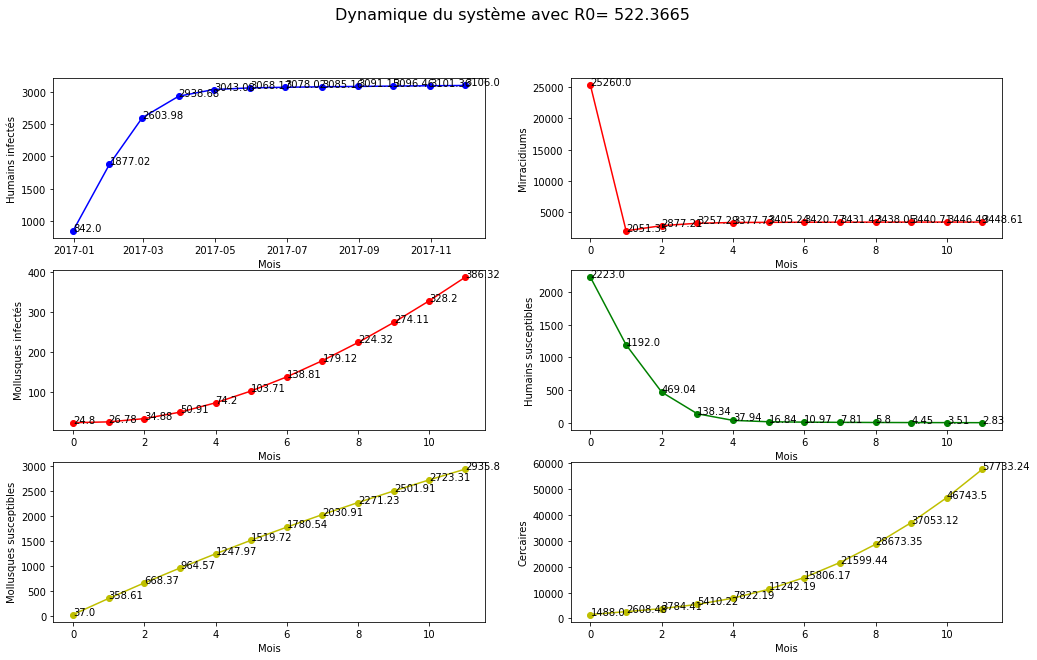

In [9]:
import math
import numpy as np
import pandas as pd
#!/usr/bin/env python3
# -*- coding: utf-8 -*- 
"""
Created on Wed Jul 29 13:05:18 2020

@author: teegwende
"""
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, timedelta
import os

from scipy.integrate import odeint,solve_ivp
#Création du dossier des graphes
now = datetime.now()
directory=str('/gdrive/MyDrive/traitement_mathematique/' +str( now.strftime(("%d_%b_%Y_%H_%M")) ) )
if not os.path.exists(directory):
    os.mkdir(directory)

np.seterr(invalid='ignore')

def model(t,y):
    Hs,Hi,K,Ms,Mi,P = y
    dHsdt = lamda_H - (beta_H*Hs*P)/(1+(a*Hs)) - (d_H*Hs) + (sigma*Hi)
    dHidt = (beta_H*Hs*P)/(1+(a*Hs)) - (d_H+sigma)*Hi
    dKdt = (alpha1*Hi) - (mu_K*K)
    dMsdt = B - (beta_M*Ms*K)/(1+(b*Ms)) - (mu*Ms)
    dMidt = (beta_M*Ms*K)/(1+(b*Ms)) - (mu*Mi)
    dPdt = (alpha2*Mi) - (mu_P*P)
    
    dydt = np.array([dHsdt,dHidt,dKdt,dMsdt,dMidt,dPdt])

    return dydt

def modelNonAuto(t,y):    
    Hs,Hi,K,Ms,Mi,P = y
    #Notation petit et grand H pour signifier qu'on fait la copie de la valeur du paramètre
    #pour ensuite continuer dans l'appel de la fonction
    #De même on a ajouté les tirets du 8 pour différencier les autres variables
    beta_h= beta_H *(1+2.5*math.sin(math.pi*(t/6) + 4.5 ) )
    beta_m=beta_M*(1+2.5*math.sin(math.pi*(t/6) + 4.5 ) )
    delta_v=B*(1+0.1* math.sin(math.pi*(t/6) )) #B pour valeur initial
    mu_=mu*(1+0.1* math.sin(math.pi*(t/6) ))
    mu_P_=mu_P*(1+0.1* math.sin(math.pi*(t/6) ))
    mu_K_=mu_K*(1+0.1* math.sin(math.pi*(t/6) ))
    alpha1_=alpha1*(1+0.1* math.sin(math.pi*(t/6) ))
    alpha2_=alpha2*(1+0.1* math.sin(math.pi*(t/6) ))

    dHsdt = lamda_H - (beta_h*Hs*P)/(1+(a*Hs)) - (d_H*Hs) + (sigma*Hi)
    dHidt = (beta_h*Hs*P)/(1+(a*Hs)) - (d_H+sigma)*Hi
    dKdt = (alpha1_*Hi) - (mu_K_*K)
    dMsdt = delta_v - (beta_m*Ms*K)/(1+(b*Ms)) - (mu_*Ms)
    dMidt = (beta_m*Ms*K)/(1+(b*Ms)) - (mu_*Mi)
    dPdt = (alpha2_*Mi) - (mu_P_*P)

    dydt = np.array([dHsdt,dHidt,dKdt,dMsdt,dMidt,dPdt])

    return dydt


#params du systeme
#lamda_H = 80000

#debutb=900
#finb=901
dt=float(input("1.0 ou 30.0 Tapez bonne valeur"))
nomModel=int(input("1-Modèle Auto  2-Modèle Non Auto"))
persistence=int(input("1-Persistence  2-Extinction"))
incidence=int(input("1-Saturation  2-Masse d'action"))

listeecarts=[]
listindex=[]



#lamda_H=80000.0/dt #se clacule en prenant (HS0*taux de natalité moyen annuel/1000)/12

if persistence==1:
    #beta_H = 4e-12/dt #un peu inconnu
    beta_H = 31.02e-5/dt #un peu inconnu
    #beta_H=1.5325E-16/dt
    #beta_H=0.000027 #tiré de Zheng
    #sigma = 0.0/dt
    sigma = (30*0.000447)/dt
    #sigma = b/dt
    #beta_M = 2e-7/dt #un peu inconnu
    beta_M = 66.09e-7/dt #un peu inconnu
    #beta_M=1.04E-09/dt
    #beta_M=8.33e-6     #Dans le papier de Zheng on a mentionné l'ordre de 10^-5 l'an. J'ai divisé par 12 pour avoir en mois
    title="Persistence"

if persistence==2:
    beta_H = 2e-12/dt #un peu inconnu
    sigma = 0.05/dt
    beta_M = 1e-7/dt #un peu inconnu
    title="Extinction"

esperancevie=56.7
tauxNatalite=46

#***** Les variables *******
#Hs0=3065.0  #Population au moment de l'enquête
#Hi0 = Hs0*0.2747 #Population infectée = Pop humaine X prévalence

Hs0=2223.0  #Population initiale = 3065 - 841.95 obtenue en faisant appel au taux de prévalence
Hi0 = 842 #Population infectée = Pop humaine X prévalence

#K0 = 15000.0
alpha1 = 30.0/dt #variable invariante
K0 = Hi0 * alpha1
#Ms0= 182
#Mi0= Ms0*0.4
Ms0= 37
Mi0= 24.8
#P0 = 15000.0
alpha2 = 60.0/dt #variable invariante
P0 = Mi0*alpha2

#******* Les paramètres *******

lamda_H=( (Hs0*46*1e-3) /12) /dt #se clacule en prenant (HS0*taux de natalité moyen annuel/1000)/12
print(lamda_H)
d_H = (1/(esperancevie*12))/dt  #Formule de calcul = 1/espérance de vie X 12
mu_K = 27.0/dt #variable invariante

#B=2.08/dt                      #Formule de calcul = (pop ini snails X taux de natalité annuel)/12 
                                    #Les 25/12 viennent du papier de Zheng. 25 c'est annuel. Je divise par 12 pour avoir la valeur mensuelle
                                    #Aussi ce n'est pas la première formule qui est utilisée puisque nous n'avons pas le taux de natalité
#B=4.68/dt
B=(1.8*182)/dt
#B=900.0/dt
print("B vaut",B)
mu = 0.01788/dt #variable invariante
mu_P = 0.2/dt  #variable invariante

if incidence == 1:
    a=5e-8/dt
    b=5e-8/dt
if incidence == 2:
    a=0.0/dt
    b=0.0/dt
y0=[Hs0,Hi0,K0,Ms0,Mi0,P0]
nomCompartiments=["Humains susceptibles","Humains infectés","Mirracidiums",
                  "Mollusques susceptibles","Mollusques infectés","Cercaires"]
#Calcul du R0 du modèle autonome
P=(alpha1*alpha2)/(mu_P*mu_K*mu*(sigma+d_H))
M=lamda_H/d_H
N=B/mu
I=beta_H*N/(1+(b*N))
W=beta_M*M/(1+(a*M))
R0=math.sqrt(P*I*W)

""""print("Les valeurs utilisées pour calculer R0")
print("P",P)
print("M",M)
print("I",I)
print("W",W)
#print(R0)
#Fin du calcul de R0"""
periodmois=pd.date_range('2016-12-01','2017-12-01',freq='M')
print(periodmois)
print("appel de la fonction RK4 de scipy")
if dt==30.0:
    period=365
    xlabel='Jours'
if dt==1.0:
    period=12
    xlabel='Mois' 

if nomModel==1:
    modelname="model"
    sol2=solve_ivp(model,[0,period],y0,t_eval=np.arange(0,period,1), method='RK45')
if nomModel==2:
    modelname="modelNonAuto"
    sol2=solve_ivp(modelNonAuto,[0,period],y0,t_eval=np.arange(0,period,1), method='RK45')

df=pd.DataFrame(np.transpose(sol2.y),columns=[nomCompartiments[0],nomCompartiments[1],nomCompartiments[2],nomCompartiments[3]
                             ,nomCompartiments[4],nomCompartiments[5]])
df["deltaT"]=sol2.t
df.to_csv(directory+'/RO_'+str(round(R0,2))+'.csv')

# affichage de la courbe des résultats des humains susceptibles
plt.figure(figsize=(20,15))
fig,axes=plt.subplots(3,2,figsize=(17,10))
#plt.grid(True)
#plt.xlim(0,n)
#plt.title("R0= "+str(round(R0,2)),loc='right')
fig.suptitle("Dynamique du système avec R0= "+str(round(R0,5)),fontsize=16)
axes[0,0].plot(periodmois,sol2.y[1,:],'b',label=nomCompartiments[1],marker='o')
for v,p in zip(sol2.y[1,:],periodmois):
    axes[0,0].annotate(round(v,2),xy=(p,v),fontsize=10)
    
axes[0,0].set_xlabel(xlabel)
axes[0,0].set_ylabel(nomCompartiments[1])
#axes[0,0].set_ylim(0,max(sol2.y[1,:]))

axes[0,1].plot(sol2.t,sol2.y[2,:],'r',label=nomCompartiments[2],marker='o')
for v,p in zip(sol2.y[2,:],sol2.t):
    axes[0,1].annotate(round(v,2),xy=(p,v),fontsize=10)
axes[0,1].set_xlabel(xlabel)
axes[0,1].set_ylabel(nomCompartiments[2])

axes[1,0].plot(sol2.t,sol2.y[4,:],'r',label=nomCompartiments[4],marker='o')
for v,p in zip(sol2.y[4,:],sol2.t):
    axes[1,0].annotate(round(v,2),xy=(p,v),fontsize=10)
axes[1,0].set_xlabel(xlabel)
axes[1,0].set_ylabel(nomCompartiments[4])

axes[1,1].plot(sol2.t,sol2.y[0,:],'g',label=nomCompartiments[0],marker='o')
for v,p in zip(sol2.y[0,:],sol2.t):
    axes[1,1].annotate(round(v,2),xy=(p,v),fontsize=10)
axes[1,1].set_xlabel(xlabel)
axes[1,1].set_ylabel(nomCompartiments[0])

axes[2,0].plot(sol2.t,sol2.y[3,:],'y',label=nomCompartiments[3],marker='o')
for v,p in zip(sol2.y[3,:],sol2.t):
    axes[2,0].annotate(round(v,2),xy=(p,v),fontsize=10)
axes[2,0].set_xlabel(xlabel)
axes[2,0].set_ylabel(nomCompartiments[3])

axes[2,1].plot(sol2.t,sol2.y[5,:],'y',label=nomCompartiments[5],marker='o')
for v,p in zip(sol2.y[5,:],sol2.t):
    axes[2,1].annotate(round(v,2),xy=(p,v),fontsize=10)
axes[2,1].set_xlabel(xlabel)
axes[2,1].set_ylabel(nomCompartiments[5])

#plt.legend()
plt.savefig(directory+'/'+modelname+'_graphes_B'+str(B)+'R0_'+str(round(R0,3))+'.pdf')
plt.show()
plt.close()

nomcol="RO="+str(round(R0,2))

#dfecarts=df.describe().loc[["min","max"]] 
#ecarts=dfecarts.loc["max"]-dfecarts.loc["min"]
#listeecarts.append(ecarts.values)
#listindex.append(nomcol)


In [ ]:
statsecarts=pd.DataFrame(listeecarts,columns=["EcartHS","EcartHI","EcartK","MS","MI","P","T"],index=listindex).transpose()
statsecarts.to_csv(directory+'/ecarts.csv')
statsecarts

""
EcartHS
EcartHI
EcartK
MS
MI
P
T


In [ ]:
df.describe().loc[["min","max"]]

,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT
min,2.23455,842.000000,2981.121925,109.00000,72.800000,4368.000000,0.0
max,2223.00000,3106.594966,25260.000000,2977.91252,442.783854,72918.308279,11.0


In [ ]:
#df.loc[(df["Humains infectés"])<0]
nomcol="RO="+str(round(R0,3))
listeecarts=[]
listindex=[]
for i in range(1,3):
    print(i)
    dfecarts=df.describe().loc[["min","max"]] 
    ecarts=dfecarts.loc["max"]-dfecarts.loc["min"]
    listeecarts.append(ecarts.values)
    listindex.append(nomcol)
print(listeecarts)
print(listindex)
pd.DataFrame(listeecarts,columns=["HS","HI","K","MS","MI","P","T"],index=listindex).transpose()

1
2
[array([4.07827466e+02, 3.63997950e+02, 2.47271148e+04, 1.56428491e+00,
       1.29514749e+01, 1.31722039e+04, 1.10000000e+01]), array([4.07827466e+02, 3.63997950e+02, 2.47271148e+04, 1.56428491e+00,
       1.29514749e+01, 1.31722039e+04, 1.10000000e+01])]
['RO=0.0', 'RO=0.0']


,RO=0.0,RO=0.0
HS,407.827466,407.827466
HI,363.997950,363.997950
K,24727.114808,24727.114808
MS,1.564285,1.564285
MI,12.951475,12.951475
P,13172.203893,13172.203893
T,11.000000,11.000000


In [ ]:
import pdfkit as pdf
df2=df.describe().loc[["min","max"]]
df2.to_html('fic.html')
pdfTmp=modelname+'_dt'+str(dt)+'_P'+str(period)+'_R0'+str(round(R0,4))+'.pdf'
pdf.from_file('fic.html', pdfTmp)

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


True

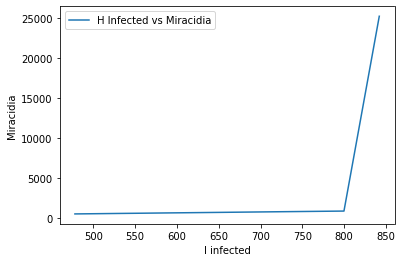

In [ ]:
plt.plot(sol2.y[1,:],sol2.y[2,:],label="H Infected vs Miracidia")
plt.xlabel("I infected")
plt.ylabel("Miracidia")
plt.legend()

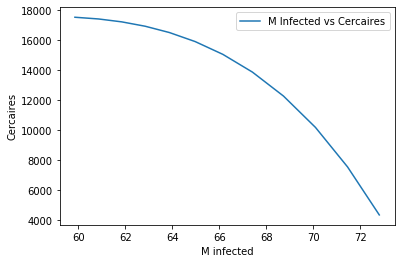

In [ ]:
plt.plot(sol2.y[4,:],sol2.y[5,:],label="M Infected vs Cercaires")
plt.xlabel("M infected")
plt.ylabel("Cercaires")
plt.legend()